<a href="https://colab.research.google.com/github/ShrutiLad242/Global-Wheat-Detection/blob/main/Copy_of_Wheat_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Global Wheat Detection

**Made by Freya Bavisi and Shruti Lad**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [ ]:
%cd /content/gdrive/MyDrive/yolov5-master

/content/gdrive/MyDrive/yolov5-master


In [ ]:
from IPython.display import Image, clear_output

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sun Feb 13 11:32:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tqdm.auto import tqdm
import shutil as sh
import cv2 as cv2
import matplotlib.pyplot as plt
from pathlib import Path
import ast
from PIL import Image, ImageDraw
import seaborn as sns

import matplotlib.patches as patches

%matplotlib inline

In [ ]:
train_df = pd.read_csv('global_wheat/train.csv')
sample_sub_csv = pd.read_csv('global_wheat/sample_submission.csv')
train='global_wheat/train/'

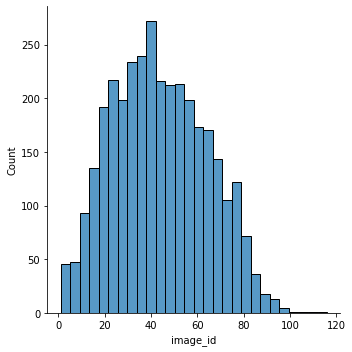

In [ ]:
sns.displot(train_df["image_id"].value_counts(),kde=False)
plt.show()

In [ ]:
train_df[['x_min','y_min', 'width', 'height']] = pd.DataFrame([ast.literal_eval(x) for x in train_df.bbox.tolist()], index= train_df.index)
train_df = train_df[['image_id', 'bbox', 'source', 'x_min', 'y_min', 'width', 'height']]
train_df

image_id                         bbox     source  ...  y_min  width  height
0       b6ab77fd7   [834.0, 222.0, 56.0, 36.0]    usask_1  ...  222.0   56.0    36.0
1       b6ab77fd7  [226.0, 548.0, 130.0, 58.0]    usask_1  ...  548.0  130.0    58.0
2       b6ab77fd7  [377.0, 504.0, 74.0, 160.0]    usask_1  ...  504.0   74.0   160.0
3       b6ab77fd7  [834.0, 95.0, 109.0, 107.0]    usask_1  ...   95.0  109.0   107.0
4       b6ab77fd7  [26.0, 144.0, 124.0, 117.0]    usask_1  ...  144.0  124.0   117.0
...           ...                          ...        ...  ...    ...    ...     ...
147788  5e0747034    [64.0, 619.0, 84.0, 95.0]  arvalis_2  ...  619.0   84.0    95.0
147789  5e0747034  [292.0, 549.0, 107.0, 82.0]  arvalis_2  ...  549.0  107.0    82.0
147790  5e0747034  [134.0, 228.0, 141.0, 71.0]  arvalis_2  ...  228.0  141.0    71.0
147791  5e0747034   [430.0, 13.0, 184.0, 79.0]  arvalis_2  ...   13.0  184.0    79.0
147792  5e0747034   [875.0, 740.0, 94.0, 61.0]  arvalis_2  ...  740.0   94.0    61.0

[147793 rows x 7 columns]

In [ ]:
!python -m pip install --upgrade pip
!pip install -r requirements.txt

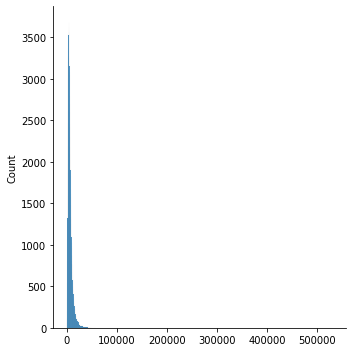

In [ ]:
sns.displot(train_df["width"]*train_df["height"],kde=False)
plt.show()

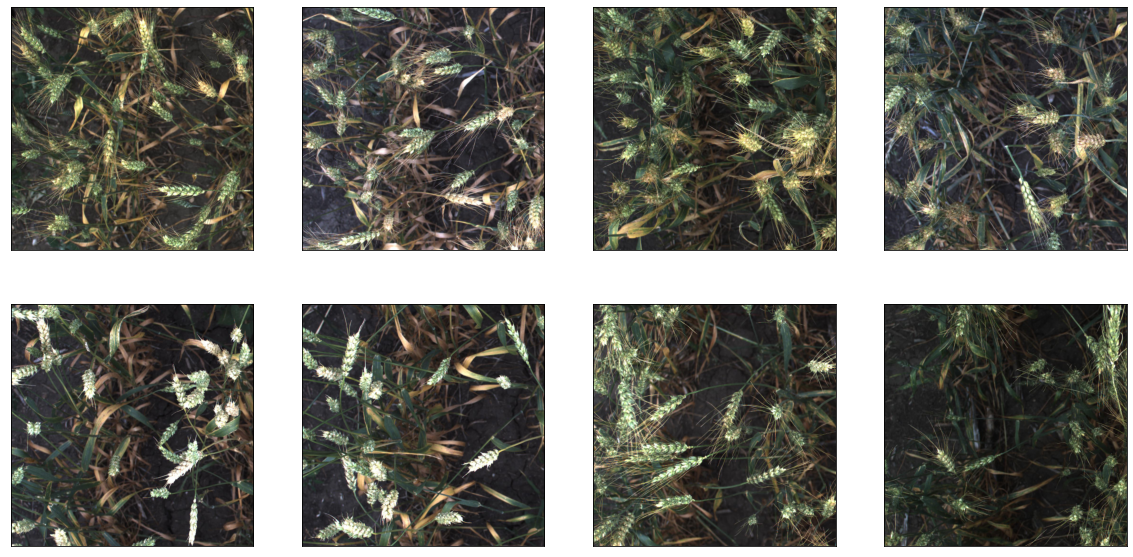

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,10))
count=0
for row in ax:
    for col in row:
        img=plt.imread(f'{os.path.join("global_wheat/train",train_df["image_id"].unique()[count])}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        col.imshow(img)
        count+=1
plt.show()

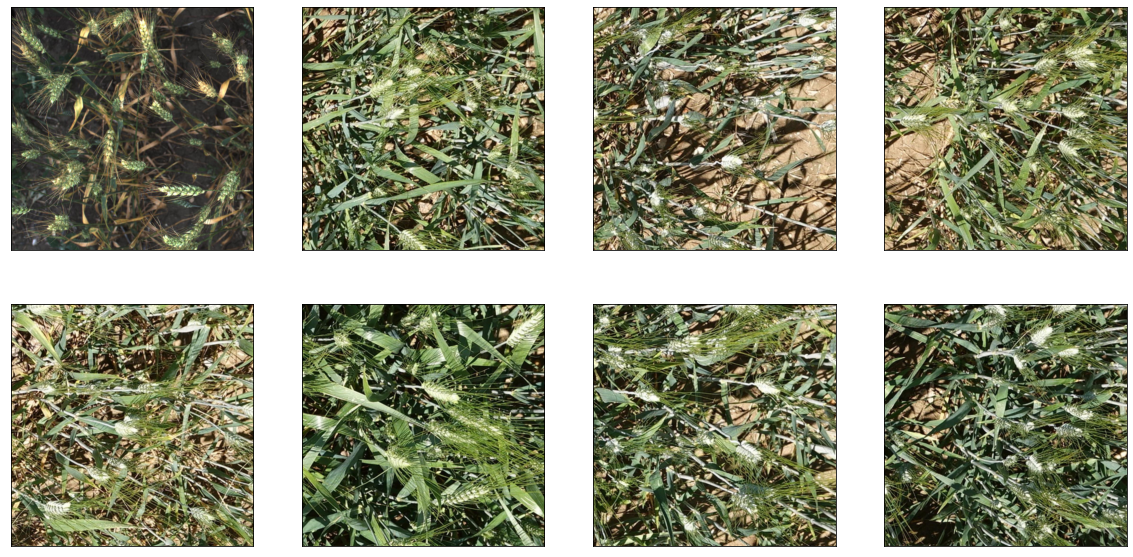

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,10))
count=0
for row in ax:
    for col in row:
        img=plt.imread(f'{os.path.join("global_wheat/train",train_df["image_id"].unique()[-count])}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        col.imshow(img)
        count+=1
plt.show()

In [ ]:
def get_bbox(image_id,df,col,color='white'):
    bboxes=df[df['image_id']==image_id]
    
    for i in range(0,len(bboxes)):
        rect=patches.Rectangle(
            (bboxes['x_min'].iloc[i],bboxes['y_min'].iloc[i]),
            bboxes['width'].iloc[i],
            bboxes['height'].iloc[i],
            linewidth=2,
            edgecolor=color,
            facecolor='none')
        col.add_patch(rect)

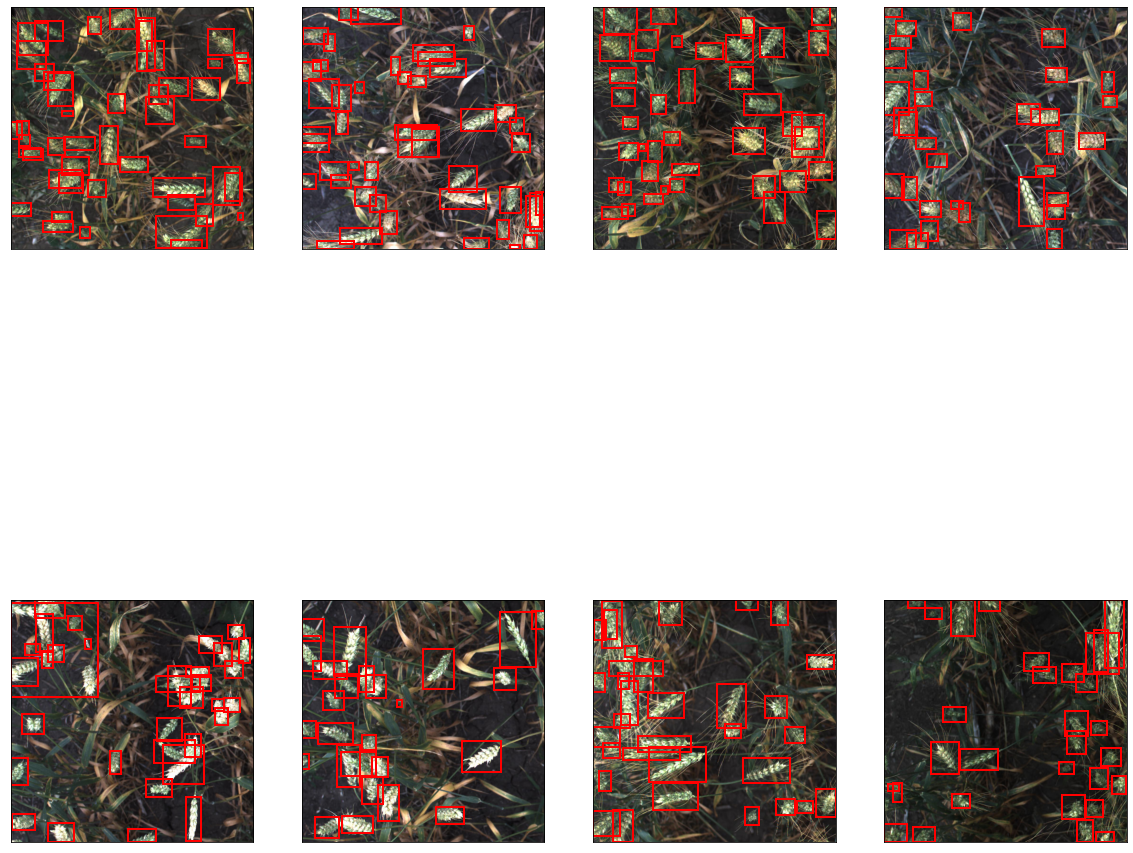

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,20))
count=0
for row in ax:
    for col in row:
        img_id=train_df["image_id"].unique()[count]
        img=plt.imread(f'{os.path.join("global_wheat/train",train_df["image_id"].unique()[count])}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        get_bbox(img_id,train_df,col,color="red")
        col.imshow(img)
        count+=1
plt.show()

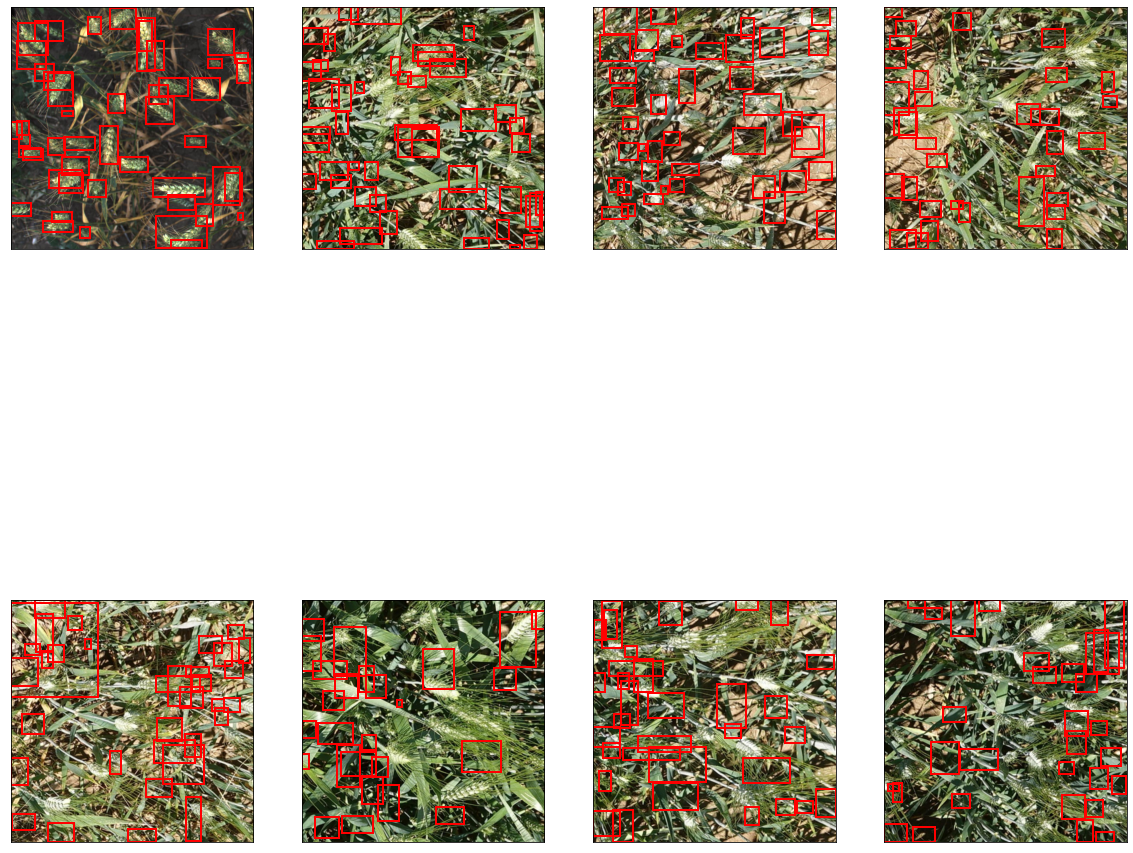

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,20))
count=0
for row in ax:
    for col in row:
        img_id=train_df["image_id"].unique()[count]
        img=plt.imread(f'{os.path.join("global_wheat/train",train_df["image_id"].unique()[-count])}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        get_bbox(img_id,train_df,col,color="red")
        col.imshow(img)
        count+=1
plt.show()

[]

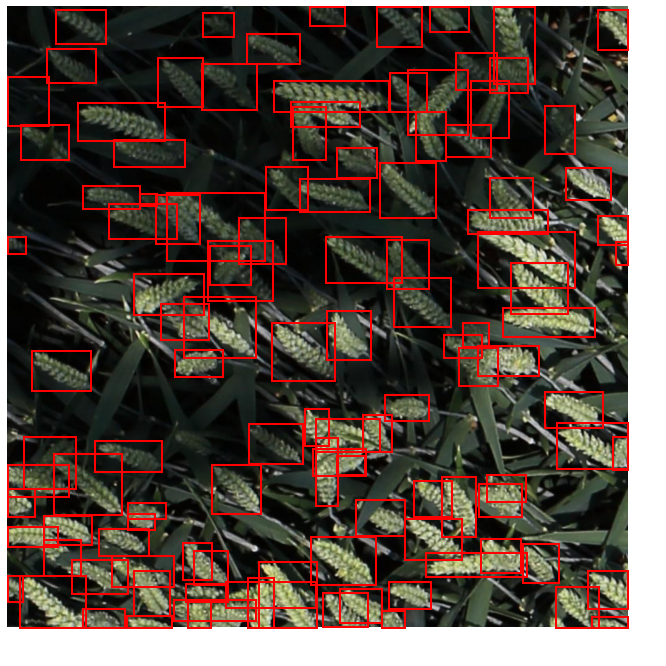

In [ ]:
image_id=(train_df['image_id'].value_counts()==116).index[0]
img=plt.imread(f'{os.path.join("global_wheat/train",image_id)}.jpg')

fig,ax=plt.subplots(1,figsize=(12,12))

ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
get_bbox(image_id,train_df,ax,color='red')
ax.imshow(img)
plt.plot()

In [ ]:
all_images=os.listdir(os.path.join('global_wheat/train'))
all_images=set([x[:-4] for x in all_images])
images_with_bbox=set(list(train_df['image_id']))
images_without_bbox=list(all_images-images_with_bbox)

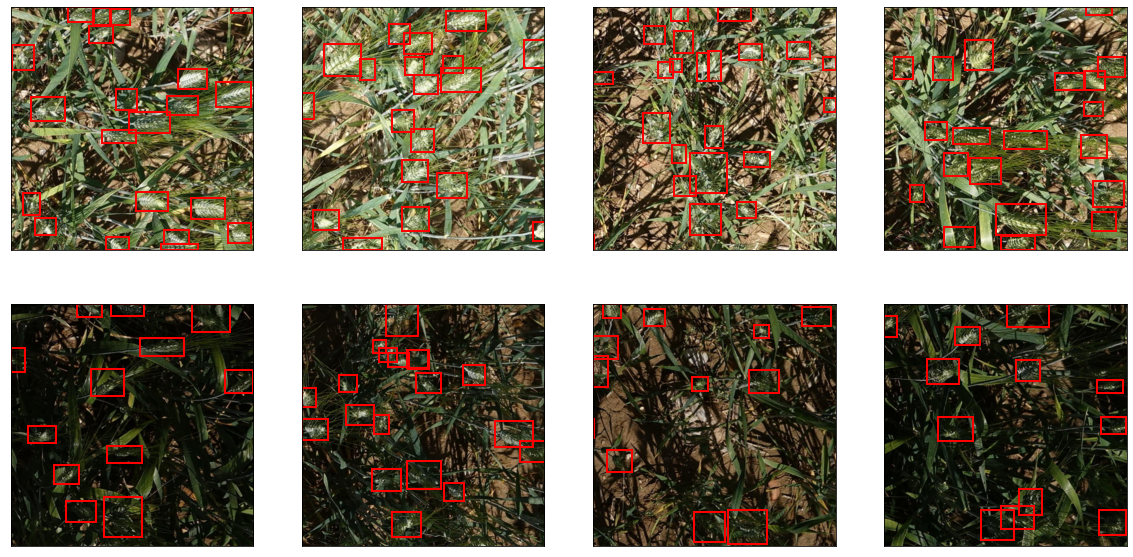

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,10))
count=20
for row in ax:
    for col in row:
        img_id=train_df["image_id"].unique()[-count]
        img=plt.imread(f'{os.path.join("global_wheat/train",train_df["image_id"].unique()[-count])}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        get_bbox(img_id,train_df,col,color="red")
        col.imshow(img)
        count+=1
plt.show()

In [ ]:

for dirname, _, filenames in os.walk("global_wheat/"):
  print("")
  for filename in filenames:
    print(os.path.join(dirname, filename))


global_wheat/train.csv
global_wheat/sample_submission.csv

global_wheat/train/b6a159fd4.jpg
global_wheat/train/b696f57e0.jpg
global_wheat/train/b6ab77fd7.jpg
global_wheat/train/b61ff5016.jpg
global_wheat/train/b6fff3f79.jpg
global_wheat/train/b70b381d0.jpg
global_wheat/train/b6324ea82.jpg
global_wheat/train/b615a1f5c.jpg
global_wheat/train/b6b899073.jpg
global_wheat/train/b69255534.jpg
global_wheat/train/b70d3e890.jpg
global_wheat/train/b628691a2.jpg
global_wheat/train/b65e07813.jpg
global_wheat/train/b6e406cd1.jpg
global_wheat/train/b6f8a915e.jpg
global_wheat/train/b67b4d2e8.jpg
global_wheat/train/b74131d1f.jpg
global_wheat/train/b72ba28ed.jpg
global_wheat/train/b8402b0ce.jpg
global_wheat/train/b84e88d30.jpg
global_wheat/train/b82f4b1cb.jpg
global_wheat/train/b8ddb6c73.jpg
global_wheat/train/b80ec5988.jpg
global_wheat/train/b75c3bb71.jpg
global_wheat/train/b79a35c8d.jpg
global_wheat/train/b7d03627f.jpg
global_wheat/train/b844b0d4f.jpg
global_wheat/train/b7341c950.jpg
global_wheat/tra

In [ ]:
df = pd.read_csv("global_wheat/train.csv")
bboxs = np.stack(df['bbox'].apply(lambda x: np.fromstring(x[1:-1], sep=',')))
for i, column in enumerate(['x', 'y', 'w', 'h']):
    df[column] = bboxs[:,i]
df.drop(columns=['bbox'], inplace=True)
df['x_center'] = df['x'] + df['w']/2
df['y_center'] = df['y'] + df['h']/2
df['classes'] = 0
from tqdm.auto import tqdm
import shutil as sh
df = df[['image_id','x', 'y', 'w', 'h','x_center','y_center','classes']]

In [ ]:
index = list(set(df.image_id))
len(index)

3373

In [ ]:

source = 'train'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('convertor/fold{}/labels/'.format(fold)+path2save)
            with open('convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row/1024
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('convertor/fold{}/images/{}'.format(fold,path2save))
            sh.copy("global_wheat/{}/{}.jpg".format(source,name),'convertor/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))

  0%|          | 0/3373 [00:00<?, ?it/s]

In [ ]:
!python train.py --img 1024 --batch 2 --epochs 15 --data wheat.yaml --cfg models/yolov5x.yaml --name wh  --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=models/yolov5x.yaml, data=wheat.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=15, batch_size=2, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=wh, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-1-28 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_